# Lesson 3. The `numpy` package

The name of the library `NumPy` is short for  **Num**erical **Py**thon. As the name suggests - it is a tool for numerical calculations in python. It contains many functions for numerical engineering calculations and new data types - particularly arrays and matrices - and operations on them.

In the literature, `numpy` is often mentioned together (and sometimes interchangeably) with another python package:` SciPy` (**Sci**entific **Py**thon). As the names suggest, `scipy` is a package for scientific computing that often includes numerical computation. Therefore, the `numpy` package functions are also included in the` scipy` package. The main difference is that the `numpy` package is written in C, and the`scipy` package is written in python. For a novice user, the differences between packages are not drastic, just remember that `numpy` provides faster performance. On the other hand, `scipy` is more flexible and powerful. In our lessons we will be using the `numpy` package most of the time. However, the interested reader may directly, or sometimes with slight modifications, use the examples (e.g. found on the internet) for the`scipy` package.

## Simple example of the package usage 

Before we can start using the package, we need to import it with the `import numpy` command. Usually, however, a more elaborate version of this command is used:

In [ ]:
import numpy as np

Let's define an example list of temperatures expressed in degrees Celsius:

In [ ]:
TvaluesC = [36.6, 36.7, 38.4, 37.5, 36.9, 38.2, 36.8, 37.0]
print(type(TvaluesC))
print(TvaluesC)

<class 'list'>
[36.6, 36.7, 38.4, 37.5, 36.9, 38.2, 36.8, 37.0]


Suppose we want to display temperature values but expressed in degrees Fahrenheit. In pure python, we should create a new list, fill it with the calculated values, and then display it:

In [ ]:
TvaluesF = [9/5*t+32 for t in TvaluesC]
print(TvaluesF)

[97.88000000000001, 98.06, 101.12, 99.5, 98.42, 100.76, 98.24, 98.60000000000001]


As we can see, apart from not very elegant calculations, we also came across problems related to the propagation of inaccuracies discussed in lesson one.

Let's try to do the same using the `numpy` package. First, let's replace the temperature list with a one-dimensional `array` of values:

In [ ]:
C=np.array(TvaluesC)
print(type(C))
print(C)

<class 'numpy.ndarray'>
[36.6 36.7 38.4 37.5 36.9 38.2 36.8 37. ]


Next, let's display the values expressed in degrees Fahrenheit: 

In [ ]:
print(9/5 * C + 32)

[ 97.88  98.06 101.12  99.5   98.42 100.76  98.24  98.6 ]


Note that we did not have to store the converted values. The conversion itself looks much better, and the displayed results are more accurate.

Let's present the temperatures in the graph:

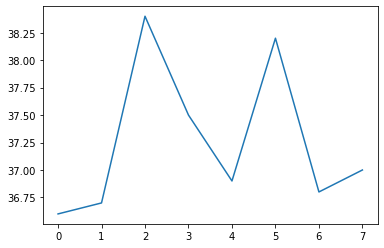

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C)
plt.show()


As you can see, the values in the array were automatically assigned to the $y$ coordinate, while the indices of these values - to the $x$ coordinate.

## Array operations 

Let's take a closer look at the capabilities of the arrays in `numpy`. Let's start by filling them with data.

### Arrays filled with uniform data

#### The `arange()` function

One of the tools for creating evenly populated arrays is the command `arange ([start,] stop [, step], [, dtype = None])`. Arguments are `start` (default $0$), `end` (not included in the result), optional `step` and `data type`. As you can see from the syntax, it is similar to Python's `range()` function, but the `arange()` command creates an array, while `range()` creates a list iterator. Let's check it in an example:

In [ ]:
import numpy as np

a = np.arange(1, 10)
print(a)
print(type(a),'\n')

x = range(1, 10)
print(x)
print(type(x))

[1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'> 

range(1, 10)
<class 'range'>


The second important difference between `arange()` and `range()` commands is the ability to use ** fractional ** values in the former:

In [ ]:
np.arange(12.04, 12.84, 0.08)

array([12.04, 12.12, 12.2 , 12.28, 12.36, 12.44, 12.52, 12.6 , 12.68,
       12.76, 12.84])

Let us note a peculiarity. By default, `arange()` fills the array with data in the range $[start, stop)$ (the right-side open range, that is, `stop` is not included in the result). This is not the case in the example above! This behaviour is the result of the floating-point rounding mechanism (without going into excessive detail).

### The `linspace()` function

The second command is the familiar `linspace()` function. Its syntax is `linspace(start, stop, num = 50, endpoint = True, retstep = False)`. It creates an array of `num` ($50$ by default) evenly spaced values in the range`start` to `stop`. Whether the `stop` value also enters the array depends on the`endpoint` argument value. It defaults to `True`, so the end of the range will be included in the resulting array. Let's see how it works:

In [ ]:
import numpy as np

# 50 wartosci z zakresu od 1 do 10:
print(np.linspace(1, 10))

# 7 wartości pomiędzy 1 and 10:
print(np.linspace(1, 10, 7))

# to samo, ale bez liczby 10:
print(np.linspace(1, 10, 7, endpoint=False))


[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


Note that after turning off the last item (`endpoint = False`), the spacing between the values also changed!

The last argument, not yet mentioned, is `retstep` (defaults to` False`). Changing the value to `True` causes that the function, apart from the array, will also return the step value (the space between adjacent values). Let's follow this in the examples:

In [ ]:
import numpy as np

dane, dystans = np.linspace(1, 50, retstep=True)
print(dane[0], dane[-1])
print(dystans,'\n')

dane, dystans = np.linspace(0, 75, 25, endpoint=True, retstep=True)
print(dane[0], dane[-1])
print(dystans,'\n')

dane, dystans = np.linspace(0, 75, 25, endpoint=False, retstep=True)
print(dane[0], dane[-1])
print(dystans)


1.0 50.0
1.0 

0.0 75.0
3.125 

0.0 72.0
3.0


### Array dimensions 

Arrays in `numpy` can be $0$-, $1$-, $2$- and multi-dimensional. A scalar is a $0$ -dimensional array. The `.ndim()` function is used to check the dimensions of an array. By the way - unlike Python lists, arrays can only contain homogeneous elements, i.e. elements of the same type. This type is stored in the `.dtype` attribute. Let's follow this example:

In [ ]:
import numpy as np

# Zero-dimensional array - scalar

S = np.array(100)
print(S)
print(type(S))
print(np.ndim(S))
print(S.dtype)
print()

# One-dimensional array (vector), integer values 

D = np.array([1,2,3,4,5,6,7,8,9])
print(D)
print(type(D))
print(np.ndim(D))
print(D.dtype)
print()

# Two-dimensional array, float-point values

F = np.array([[0.1, 0.2],[0.2, 0.3],[0.3, 0.4]])
print(F)
print(type(F))
print(np.ndim(F))
print(F.dtype)

100
<class 'numpy.ndarray'>
0
int64

[1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
1
int64

[[0.1 0.2]
 [0.2 0.3]
 [0.3 0.4]]
<class 'numpy.ndarray'>
2
float64


The shape of an array can be checked using the `shape()` function or the attribute with the same name:

In [ ]:
import numpy as np

# 2D array

D = np.array([[1,2,3],[4,5,6]])
print(D)
print(np.shape(D))
print(D.shape)
print()

# 3D array

T = np.array([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[21,22,23,24],[25,26,27,28],[29,30,31,32]]])
print(T)
print(np.shape(T))
print(T.shape)
print()

# scalar

S = np.array(100)
print(S)
print(np.shape(S))
print(S.shape)


[[1 2 3]
 [4 5 6]]
(2, 3)
(2, 3)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[21 22 23 24]
  [25 26 27 28]
  [29 30 31 32]]]
(2, 3, 4)
(2, 3, 4)

100
()
()


As we can see, `shape` returns a tuple with as many elements as the array has dimensions (axes). The corresponding tuple values express the size (length) of the array in a given direction (axis). For a scalar array, the tuple is empty.

### Arrays of ones and zeros

It is often necessary to create arrays that consist of only 1's or 0's. `numpy` provides some functions for this, called (as you might guess) `ones()` and `zeros()`. The obligatory argument is an integer or a tuple of integers that define the dimensions and sizes of the array. The resulting array contains values (ones or zeros, respectively) of the type `float64`. If we want to create an array of integers, we can specify it with the `dtype = int` parameter. Let's check this example:

In [ ]:
import numpy as np

# vector of ones (float type)

A = np.ones(5)
print(A)
print(A.dtype)
print()

# 3x5 array of zeros (int type)

B = np.zeros((3,5), dtype=int)
print(B)
print(B.dtype)
print()

[1. 1. 1. 1. 1.]
float64

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
int64



You can also create arrays of ones and zeros from existing arrays. The resulting array will have the same dimension, size, and data type as the original:

In [ ]:
import numpy as np

A = np.array([1,2,3,4])
B = np.array([[1.2,2.5],[0.11,-1.75]])

C=np.zeros_like(A)
D=np.ones_like(B)

print(A, A.dtype)
print(C, C.dtype)
print()
print(B, B.dtype)
print(D, D.dtype)

[1 2 3 4] int64
[0 0 0 0] int64

[[ 1.2   2.5 ]
 [ 0.11 -1.75]] float64
[[1. 1.]
 [1. 1.]] float64


In linear algebra, the identity matrix $I$ is often used. It is a square matrix having ones on the main diagonal and zeros everywhere else. In numpy, use the `identity()` command to create it.

In [ ]:
import numpy as np

I = np.identity(7, int)

print(I)

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


### Indexing and slicing arrays

We can refer to individual elements of arrays (regardless of their dimensions) in the standard way, identical to other sequence types in python. Remember that we index from $0$ and the end of the range is not included:

In [ ]:
import numpy as np

# Square array 10x10

A=np.array([[i+j for i in np.linspace(0.1,1,10)] for j in np.linspace(10,19,10)])
print(A)
print()
# First element of the first row:

print('A[0,0] =', A[0][0])

# Third row, fourth column:

print('A[2,3] =', A[2][3])

# second to the last row, last column:

print('A[-2,-1] =', A[-2][-1])

[[10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ]
 [11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12. ]
 [12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13. ]
 [13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14. ]
 [14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15. ]
 [15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16. ]
 [16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17. ]
 [17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18. ]
 [18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19. ]
 [19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20. ]]

A[0,0] = 10.1
A[2,3] = 12.4
A[-2,-1] = 19.0


The `numpy` environment, however, allows for more natural indexing, in line with mathematical intuition, where both indices (for two-dimensional arrays) are placed in single square brackets and separated with a comma:

In [ ]:
# First element of the first row:

print('A[0,0] =', A[0, 0])

# Third row, fourth column:

print('A[2,3] =', A[2, 3])

# second to the last row, last column:

print('A[-2,-1] =', A[-2, -1])



A[0,0] = 10.1
A[2,3] = 12.4
A[-2,-1] = 19.0


This way of indexing shows its actual usefulness when slicing fragments (ranges) of arrays:

In [ ]:
# upper left corner, 2x3 size:
print(A[:2,:3])
print()

# four central elements:

print(A[4:6,4:6])
print()

# even rows, odd columns

print(A[1::2, ::2])
print()

# last column

print(A[:, -1:])

[[10.1 10.2 10.3]
 [11.1 11.2 11.3]]

[[14.5 14.6]
 [15.5 15.6]]

[[11.1 11.3 11.5 11.7 11.9]
 [13.1 13.3 13.5 13.7 13.9]
 [15.1 15.3 15.5 15.7 15.9]
 [17.1 17.3 17.5 17.7 17.9]
 [19.1 19.3 19.5 19.7 19.9]]

[[11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]]


This is only a tiny part of the possibilities of array creating and accessing. We encourage you to experiment on your own.